# How to use bikit-models

In [7]:
# This line is used to reload the extension:
# THIS CODE IS UNNECESSARY TO BE EXECUTED
%reload_ext autoreload

In [4]:
%load_ext autoreload
%autoreload 3
import os, sys
sys.path.insert(0, os.path.abspath('./models'))

import torch
import torch.nn as nn

import utils
from vistranet_0 import build_vistra_0
from vistranet_1 import build_vistra_1
from daclnet import build_dacl

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load an example image

In [5]:
img_path = './assets/image_0000468_crop_0000001.png'

## Use models from daclnet
Each model has a `cat_to_name` dictionary which defines the order of the classes in the output. 

c:\Users\pende\anaconda3\envs\bikit-env\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\pende\anaconda3\envs\bikit-env\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Large_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Large_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


=====Model summary=====
The model was instantiated from ./models/checkpoints/codebrim-classif-balanced/codebrim-classif-balanced_MobileNetV3-Large_hta.pth with the following arguments:
dataset: codebrim-classif-balanced
base: mobilenet
resolution: 224
run: earnest-durian-22
best_val_loss_cp: 0.23312173125805793
best_val_emr_cp: 0.8607633113861084
best_val_epoch_cp: 44
hidden_layers: [1024]
learning_rate: 1e-05
lr_base: False
scheduler_name: cosine
drop_prob: 0.3
approach: hta
num_class: 6
cat_to_name: {0: 'NoDamage', 1: 'Crack', 2: 'Efflorescence', 3: 'Spalling', 4: 'BarsExposed', 5: 'Rust'}
The base is frozen: True

********** Output **********
NoDamage: 5.47%
Crack: 1.24%
Efflorescence: 0.27%
Spalling: 98.58%
BarsExposed: 96.62%
Rust: 80.03%


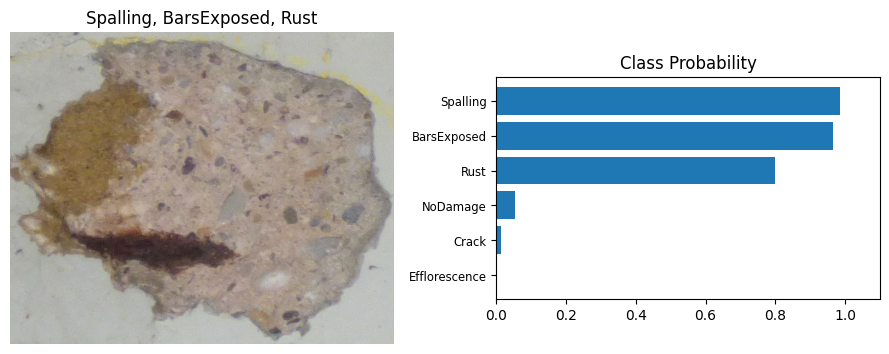

In [6]:
# Preprocess image
img_proc = utils.process_img_daclnet(img_path)

# Instantiate the model:
model, cat_to_name = build_dacl(cp_path= './models/checkpoints/codebrim-classif-balanced/codebrim-classif-balanced_MobileNetV3-Large_hta.pth')

model.eval()
with torch.no_grad(): # Disable tracking of gradients in autograd (saves some time)
    logits = model(img_proc)
    preds = torch.sigmoid(logits).float().squeeze(0)

# Make a dict with the predictions:
preds_dict = {v:round(preds[int(k)].item(),4) for k,v in cat_to_name.items()}
print('*'*10, 'Output', '*'*10)
for k,v in preds_dict.items():
    print('%s: %.2f%%' % (k,v*100)) 
# View the classified image and it's predictions:
utils.view_classify(img_path, preds_dict)

## Use model from SOFIA (vistranet_0)

frozen encoder  encoder
vit_small adapter built. 0 trainable params, 21656833 frozen params.
frozen decoder  decoder
decoder adapter built. 0 trainable params, 9222 frozen params.
quantization


c:\Users\pende\anaconda3\envs\bikit-env\lib\site-packages\torch\_utils.py:383: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  device=storage.device,


=====Model summary=====
The model was instantiated from ./models/checkpoints/codebrim-classif-balanced/codebrim-classif-balanced_ViT_s8_0.pth and loaded with msg: <All keys matched successfully> with the following arguments:
img_size: 224
num_class: 6
cat_to_name: {0: 'NoDamage', 1: 'Crack', 2: 'Spalling', 3: 'Efflorescence', 4: 'BarsExposed', 5: 'Rust'}
dataset: codebrim-classif-balanced

********** Output **********
NoDamage: 0.04%
Crack: 0.01%
Spalling: 99.94%
Efflorescence: 0.02%
BarsExposed: 98.05%
Rust: 46.80%


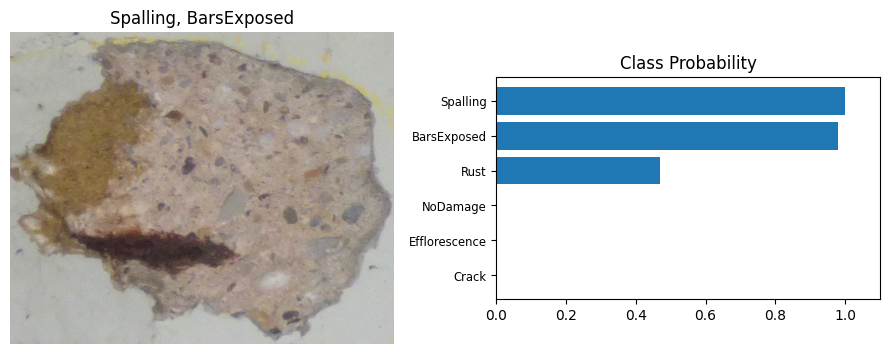

In [7]:
# Preprocess image
img_proc = utils.process_img_vistranet(img_path)

# Instantiate the model:
model, cat_to_name = build_vistra_0(cp_path='./models/checkpoints/codebrim-classif-balanced/codebrim-classif-balanced_ViT_s8_0.pth')

model.eval()
with torch.no_grad(): # Disable tracking of gradients in autograd (saves some time)
    logits = model(img_proc)
    preds = torch.sigmoid(logits).float().squeeze(0)

# Make a dict with the predictions:
preds_dict = {v:round(preds[int(k)].item(),4) for k,v in cat_to_name.items()}
print('*'*10, 'Output', '*'*10)
for k,v in preds_dict.items():
    print('%s: %.2f%%' % (k,v*100)) 
# View the classified image and it's predictions:
utils.view_classify(img_path, preds_dict)

## Use model from SOFIA (vistranet_1)

Take key encoder in provided checkpoint dict
Pretrained weights found at ./models/checkpoints/codebrim-classif-balanced/codebrim-classif-balanced_ViT_s8_1.pth and loaded with msg: <All keys matched successfully>
pretrained weights loaded
vit_small adapter built. 0 trainable params, 21656833 frozen params.
Take key decoder in provided checkpoint dict
Pretrained weights found at ./models/checkpoints/codebrim-classif-balanced/codebrim-classif-balanced_ViT_s8_1.pth and loaded with msg: <All keys matched successfully>
pretrained weights loaded
decoder adapter built. 0 trainable params, 9222 frozen params.
=====Model summary=====
The model was instantiated from ./models/checkpoints/codebrim-classif-balanced/codebrim-classif-balanced_ViT_s8_1.pth with the following arguments:
img_size: 224
num_class: 6
cat_to_name: {0: 'NoDamage', 1: 'Crack', 2: 'Spalling', 3: 'Efflorescence', 4: 'BarsExposed', 5: 'Rust'}
dataset: codebrim-classif-balanced

********** Output **********
NoDamage: 0.01%
Crack: 

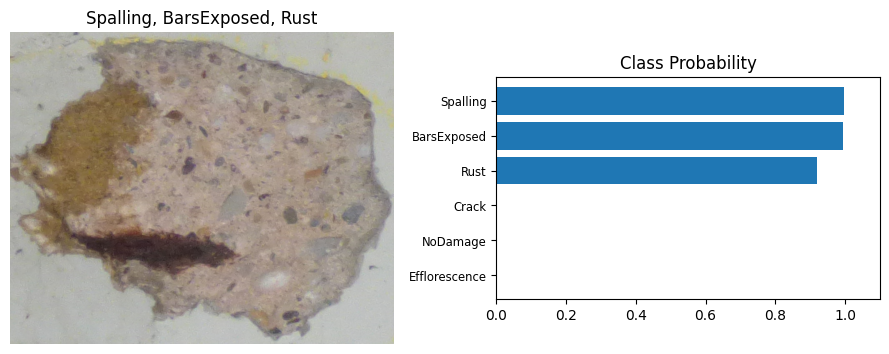

In [8]:
# Preprocess image
img_proc = utils.process_img_vistranet(img_path)

# Instantiate the model:
model, cat_to_name = build_vistra_1(cp_path='./models/checkpoints/codebrim-classif-balanced/codebrim-classif-balanced_ViT_s8_1.pth')

model.eval()
with torch.no_grad(): # Disable tracking of gradients in autograd (saves some time)
    logits = model(img_proc)
    preds = logits.float().squeeze(0)

# Make a dict with the predictions:
preds_dict = {v:round(preds[int(k)].item(),4) for k,v in cat_to_name.items()}
print('*'*10, 'Output', '*'*10)
for k,v in preds_dict.items():
    print('%s: %.2f%%' % (k,v*100)) 
# View the classified image and it's predictions:
utils.view_classify(img_path, preds_dict)

## Use a PyTorch model from daclnet which was converted to TorchScript by tracing
The models are located at: `./models/jit_models/*/*.pt`.
There are no TorchScript models for EfficientNetV1-B0 due to the following Error when trying to convert it:
```
RuntimeError: 
Could not export Python function call 'SwishImplementation'. Remove calls to Python functions before export. Did you forget to add @script or @script_method annotation? If this is a nn.ModuleList, add it to __constants__:
```

********** Output **********
NoDamage: 5.47%
Crack: 1.24%
Efflorescence: 0.27%
Spalling: 98.58%
BarsExposed: 96.62%
Rust: 80.03%


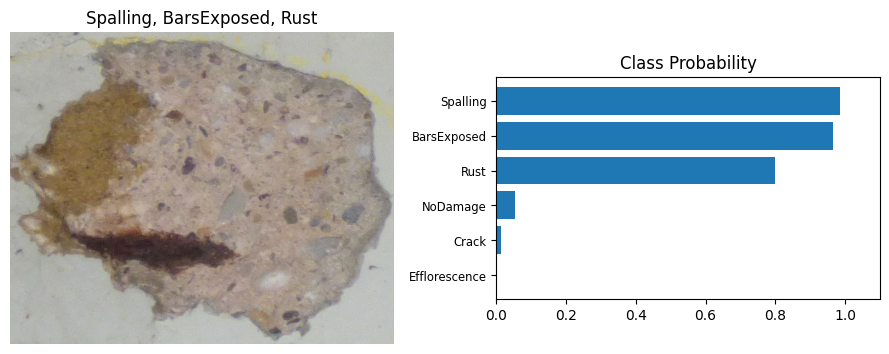

In [9]:
# Preprocess image
img_proc = utils.process_img_daclnet(img_path) # Make sure to use the preprocessing according to the 
                                               # original submission (If results shall be reproduced)

model = torch.jit.load('./models/jit_models/codebrim-classif-balanced/codebrim-classif-balanced_MobileNetV3-Large_hta.pt')
model.eval()

with torch.no_grad(): # Disable tracking of gradients in autograd (saves some time)
    logits = model(img_proc)
    preds = torch.sigmoid(logits).float().squeeze(0)

# We couldn't save the 'cat_to_name'-dict in the TorchScript so we have to define it ourselves:
cat_to_name = {0: 'NoDamage', 1: 'Crack', 2: 'Efflorescence', 3: 'Spalling', 4: 'BarsExposed', 5: 'Rust'}

# Make a dict with the predictions:
preds_dict = {v:round(preds[int(k)].item(),4) for k,v in cat_to_name.items()}
print('*'*10, 'Output', '*'*10)
for k,v in preds_dict.items():
    print('%s: %.2f%%' % (k,v*100)) 
# View the classified image and it's predictions:
utils.view_classify(img_path, preds_dict)

## Use a PyTorch model from SOFIA (vistranet_0) which was converted to TorchScript by tracing
The models are located at: `./models/jit_models/*.pt`

********** Output **********
NoDamage: 0.04%
Crack: 0.01%
Spalling: 99.94%
Efflorescence: 0.02%
BarsExposed: 98.05%
Rust: 46.80%


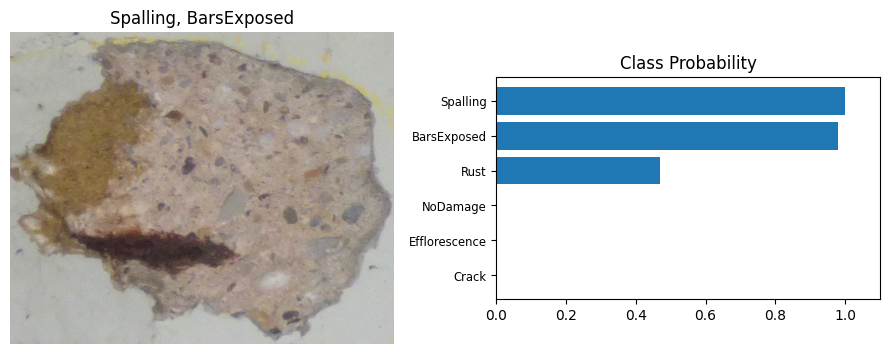

In [10]:
# Preprocess image
img_proc = utils.process_img_vistranet(img_path) # Make sure to use the preprocessing according to the 
                                               # original submission (If results shall be reproduced)

model = torch.jit.load('./models/jit_models/codebrim-classif-balanced/codebrim-classif-balanced_ViT_s8_0.pt')
model.eval()

with torch.no_grad(): # Disable tracking of gradients in autograd (saves some time)
    logits = model(img_proc)
    preds = torch.sigmoid(logits).float().squeeze(0)

# We couldn't save the 'cat_to_name'-dict in the TorchScript so we have to define it ourselves:
cat_to_name = {0: 'NoDamage', 1: 'Crack', 2: 'Spalling', 3: 'Efflorescence', 4: 'BarsExposed', 5: 'Rust'}

# Make a dict with the predictions:
preds_dict = {v:round(preds[int(k)].item(),4) for k,v in cat_to_name.items()}
print('*'*10, 'Output', '*'*10)
for k,v in preds_dict.items():
    print('%s: %.2f%%' % (k,v*100)) 
# View the classified image and it's predictions:
utils.view_classify(img_path, preds_dict)

## Use a PyTorch model from SOFIA (vistranet_1) which was converted to TorchScript by tracing
The models are located at: `./models/jit_models/*.pt`

********** Output **********
NoDamage: 0.01%
Crack: 0.01%
Spalling: 99.66%
Efflorescence: 0.00%
BarsExposed: 99.46%
Rust: 92.00%


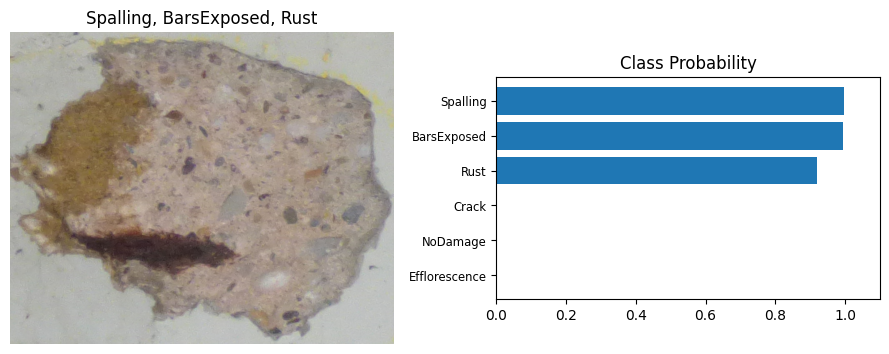

In [11]:
# Preprocess image
img_proc = utils.process_img_vistranet(img_path) # Make sure to use the preprocessing according to the 
                                               # original submission (If results shall be reproduced)

model = torch.jit.load('./models/jit_models/codebrim-classif-balanced/codebrim-classif-balanced_ViT_s8_1.pt')
model.eval()

with torch.no_grad(): # Disable tracking of gradients in autograd (saves some time)
    logits = model(img_proc)
    preds = logits.float().squeeze(0)

# We couldn't save the 'cat_to_name'-dict in the TorchScript so we have to define it ourselves:
cat_to_name = {0: 'NoDamage', 1: 'Crack', 2: 'Spalling', 3: 'Efflorescence', 4: 'BarsExposed', 5: 'Rust'}

# Make a dict with the predictions:
preds_dict = {v:round(preds[int(k)].item(),4) for k,v in cat_to_name.items()}
print('*'*10, 'Output', '*'*10)
for k,v in preds_dict.items():
    print('%s: %.2f%%' % (k,v*100)) 
# View the classified image and it's predictions:
utils.view_classify(img_path, preds_dict)